# 凸包の算出

In [1]:
import pandas as pd
import json
import numpy as np
from scipy.spatial import ConvexHull

from nbagravity import read_game_info, read_tracking_data, caluculate_convex_hull_areas

In [2]:
file_path = '../data-games/01.03.2016.ATL.at.NYK.json'

In [3]:
game_info = read_game_info(file_path)
tracking_data = pd.DataFrame(read_tracking_data(file_path)).sort_values("unixtime")

teamid_visitor = game_info["visitor_team_id"]
teamid_home = game_info["home_team_id"]
positions_set = tracking_data["position"]

In [4]:
areas_set = caluculate_convex_hull_areas(positions_set, teamid_visitor, teamid_home)
areas_pd = pd.DataFrame(areas_set)
df = pd.concat([tracking_data, areas_pd], axis=1)

In [5]:
df

,unixtime,movieId,eventId,quater,quatertime,shotclock,position,convex_hull_area_visitor,convex_hull_area_home
0,1.451854e+09,"[0, 1]","[1, 2]",1,720.00,24.0,"[[-1, -1, 53.16232, 30.8764, 4.26479], [161061...",38.676048,69.228883
1,1.451854e+09,"[0, 1]","[1, 2]",1,720.00,24.0,"[[-1, -1, 52.873, 31.33672, 3.91323], [1610612...",38.016485,68.665337
2,1.451854e+09,"[0, 1]","[1, 2]",1,720.00,24.0,"[[-1, -1, 52.55753, 32.19158, 3.26032], [16106...",37.305621,68.184561
3,1.451854e+09,"[0, 1]","[1, 2]",1,720.00,24.0,"[[-1, -1, 52.34466, 32.6519, 2.90876], [161061...",36.426249,67.730624
4,1.451854e+09,"[0, 1]","[1, 2]",1,720.00,24.0,"[[-1, -1, 52.26012, 32.01862, 3.24496], [16106...",35.224439,67.238650
...,...,...,...,...,...,...,...,...,...
60435,1.451861e+09,[318],[361],4,0.19,NaN,"[[-1, -1, 42.14548, 3.80867, 4.5393], [1610612...",156.976054,175.128774
60436,1.451861e+09,[318],[361],4,0.15,NaN,"[[-1, -1, 42.07059, 3.63509, 4.50937], [161061...",156.727073,174.508069
60437,1.451861e+09,[318],[361],4,0.11,NaN,"[[-1, -1, 41.99981, 3.55555, 4.48822], [161061...",156.398648,173.935453
60438,1.451861e+09,[318],[361],4,0.07,NaN,"[[-1, -1, 42.1552, 3.99198, 5.1729], [16106127...",156.141030,173.394064


<Axes: >

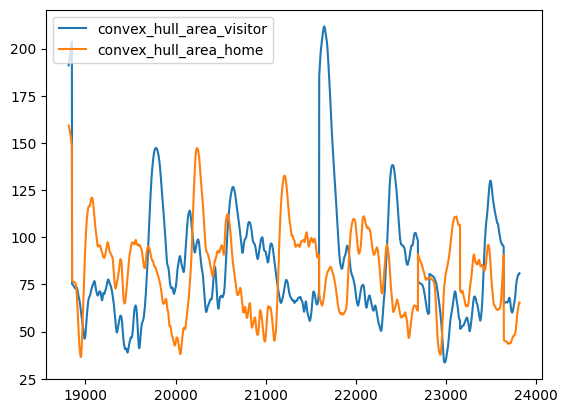

In [7]:
df[df["quater"] == 3][["convex_hull_area_visitor", "convex_hull_area_home"]][:5000].plot()